In [1]:
import matplotlib.pyplot as plt

In [34]:
path_image = '/Users/marie.dausse/code/mariedos/clairel/ArtRecognition/raw_data/train_dir/train/source_images/2.jpg'
image_test =plt.imread(path_image)

In [21]:
image_test.shape

(482, 400, 3)

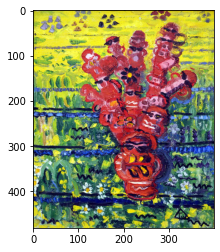

In [6]:
plt.imshow(image_test);

In [92]:
def check_extension(filename): 
    ALLOWED_EXTENSION = ["jpg", "jpeg", "png"]
    extension = filename.split(".")[-1:][0].lower()
    print(extension)
    if extension not in ALLOWED_EXTENSION : 
        return False
    else : 
        return True

In [93]:
check_extension(path_image)

jpg


True

In [29]:
from PIL import Image
from io import BytesIO

def read_imagefile(file):
    image = Image.open(path_image)
    return image

In [27]:
def read_imagefile(file) -> Image.Image:
    image = Image.open(BytesIO(file))
    return image

In [48]:
img =read_imagefile(path_image)

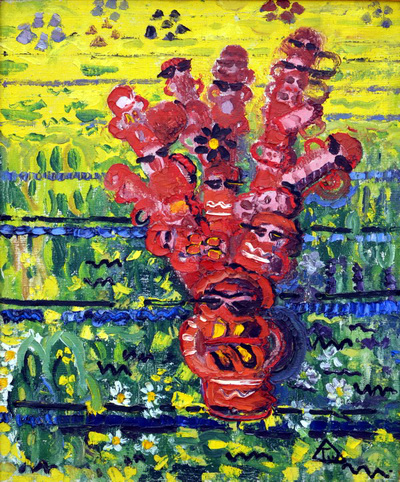

In [49]:
img

In [39]:
img = np.array(img)
img.shape

(482, 400, 3)

In [40]:
from tensorflow.keras.models import load_model

In [46]:
model = load_model('/Users/marie.dausse/code/mariedos/clairel/ArtRecognition/models/Model_v0_art12_emb100_withDA')

In [47]:
model.predict(img)

ValueError: in user code:

    /Users/marie.dausse/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1462 predict_function  *
        return step_function(self, iterator)
    /Users/marie.dausse/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1452 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /Users/marie.dausse/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /Users/marie.dausse/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /Users/marie.dausse/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    /Users/marie.dausse/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1445 run_step  **
        outputs = model.predict_step(data)
    /Users/marie.dausse/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1418 predict_step
        return self(x, training=False)
    /Users/marie.dausse/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/tensorflow/python/keras/engine/base_layer.py:985 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    /Users/marie.dausse/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/tensorflow/python/keras/engine/functional.py:386 call
        inputs, training=training, mask=mask)
    /Users/marie.dausse/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/tensorflow/python/keras/engine/functional.py:508 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    /Users/marie.dausse/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/tensorflow/python/keras/engine/base_layer.py:976 __call__
        self.name)
    /Users/marie.dausse/.pyenv/versions/3.7.7/envs/lewagon/lib/python3.7/site-packages/tensorflow/python/keras/engine/input_spec.py:180 assert_input_compatibility
        str(x.shape.as_list()))

    ValueError: Input 0 of layer sequential_1 is incompatible with the layer: expected ndim=4, found ndim=3. Full shape received: [None, 400, 3]


In [64]:
from tensorflow.keras.preprocessing.image import load_img

def read_imagefile(file) -> Image.Image:
    img = load_img(file, grayscale=False, color_mode='rgb', target_size=(224, 224), interpolation='bilinear')
    img = np.array(img)
    img = np.expand_dims(img, axis = 0)
    return img

In [67]:
img_test =read_imagefile(path_image)

In [73]:
pred = model.predict(img_test)
artiste_index = np.argmax(pred[0])

In [74]:
artiste_index

8

In [99]:
path_image

'/Users/marie.dausse/code/mariedos/clairel/ArtRecognition/raw_data/train_dir/train/source_images/2.jpg'

In [116]:
def read_imagefile(file) -> Image.Image:
    #img = Image.open(BytesIO(file))
    img = Image.open(file)
    #img = load_img(file, grayscale=False, color_mode='rgb', target_size=(224, 224), interpolation='bilinear')
    img = np.array(img)
    img = np.expand_dims(img, axis = 0)
    return img

In [118]:
read_imagefile(open(path_image,'rb')).shape

(1, 482, 400, 3)

In [119]:
from tensorflow.keras.models import load_model

In [167]:
!ls '/Users/marie.dausse/code/mariedos/clairel/ArtRecognition/models/model_v4'

saved_model.pb variables


In [170]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
tf_op_layer_strided_slice (T (None, 224, 224, 3)       0         
_________________________________________________________________
tf_op_layer_BiasAdd (TensorF (None, 224, 224, 3)       0         
_________________________________________________________________
sequential (Sequential)      (None, 50)                15969138  
_________________________________________________________________
dense_1 (Dense)              (None, 12)                612       
Total params: 15,969,750
Trainable params: 15,969,750
Non-trainable params: 0
_________________________________________________________________


In [25]:
path_image = '/Users/marie.dausse/code/mariedos/clairel/ArtRecognition/raw_data/train_dir/Top_12/_10/1098.jpg'

In [30]:
import numpy as np
from tensorflow.python.ops import image_ops
from tensorflow.python.ops import io_ops
def path_to_image(path, image_size, num_channels, interpolation):
    img = io_ops.read_file(path)
    img = image_ops.decode_image(
      img, channels=num_channels, expand_animations=False)
    img = image_ops.resize_images_v2(img, image_size, method=interpolation)
    img.set_shape((image_size[0], image_size[1], num_channels))
    return img
img_test = path_to_image(path_image, (224, 224), 3, 'bilinear')


In [32]:
img_test.shape

TensorShape([224, 224, 3])

In [33]:
img_test = np.array(img_test)
img_test = np.expand_dims(img_test, axis = 0)

In [35]:
img_test.shape

(1, 224, 224, 3)

In [27]:
from tensorflow.keras.models import load_model
model = load_model('/Users/marie.dausse/code/mariedos/clairel/ArtRecognition/models/model_v4')

In [46]:
pred = model.predict(img_test)
artiste_index = np.argmax(pred[0])

In [51]:
pred[0]

array([2.5735945e-13, 7.8455096e-01, 2.2996942e-16, 1.2419443e-04,
       1.9495274e-26, 1.8892129e-06, 2.1241408e-35, 1.8628203e-36,
       4.0136236e-10, 1.1873255e-33, 2.1532294e-01, 1.1105137e-28],
      dtype=float32)

In [37]:
def read_imagefile(file): 
    img = Image.open(file)
    img = img.resize((224,224),resample=Image.BILINEAR)
    img = np.array(img)
    img = np.expand_dims(img, axis = 0)
    return img

In [42]:
from PIL import Image
from io import BytesIO
test =read_imagefile('/Users/marie.dausse/code/mariedos/clairel/ArtRecognition/raw_data/train_dir/Top_12/_7/313.jpg')

In [55]:
liste_artiste = ['_1',
'_10',
'_11',
'_12',
'_2',
'_3',
'_4',
'_5',
'_6',
'_7',
'_8',
'_9']

In [56]:
liste_index = []
for i in range(len(liste_artiste)):
    liste_index.append(i)

In [57]:
dico_artistes = dict(zip(liste_index,liste_artiste))

In [58]:
dico_artistes

{0: '_1',
 1: '_10',
 2: '_11',
 3: '_12',
 4: '_2',
 5: '_3',
 6: '_4',
 7: '_5',
 8: '_6',
 9: '_7',
 10: '_8',
 11: '_9'}

In [59]:
import pandas as pd
data = pd.read_csv('/Users/marie.dausse/code/mariedos/clairel/ArtRecognition/ArtRecognition/data/database.csv')

In [69]:
data_artist =data[data.loc[:,'artist_number'] == '_12']
list(data_artist['artist'])[0]

'Zdislav Beksinski'